Yahoo finance (n)

Proszę wstawić print screen z np. jupyter notebooka, gdzie:

- będą widoczne 2 wykresy ze średnią ruchomą (pandas, altair)

- będzie widoczny kod, który wygenerował wykresy.


Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_yahoo_niestacj.jpg

Dane:
    
https://finance.yahoo.com/quote/CSV/history/?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJjgOLcqSa79X2NVcDfaAsiL9BAHg5RvrFg6uir9MoKK8kw1oCE7Io1rINBuyWaJzgkx4TiRiOL_UMQKHk9Lp2Ne9IZ7hwh-3ettI5wsQEvlI2guv04Y0DrmkdAYNKm_baNDrq-DX0kN7r07wdmeKavlvqjoWZWgGPyncARRyqtG&guccounter=2


In [676]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [677]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [678]:
def get_local_csv(path="houses_data.csv"):
    """
    Loads csv file into my_data variable and displays it's head.

        Parameters:
            path (str): Path to local file with extension. Must be '.csv'. Default = 'houses_data.csv'
        Returns:
            my_data (DataFrame): Global variable that holds loaded DataFrame.
    """
    
    global my_data
    
    if not re.search(r"(.csv)", path):
        raise SyntaxError("Only .csv are files allowed")
    else:
        my_data = pd.read_csv(path)
        
    return display(my_data.head())

In [679]:
get_local_csv()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Pandas

In [680]:
def smaller_df(source=my_data, x="Date", y="Price", y_rolling=True, x_as_index=True) :
    """
    Reduces taken DataFrame to two columns (x, y) and calculates rolling mean for y values. 
    Could set x as index.

        Parameters:
            source (DataFrame): DataFrame with 2 and more columns. Default = my_data.
            x (array-like): Column name from source paremeter. Default = 'Date'.
            y (array-like): Column name from source paremeter. Default = 'Price'.
            y_rolling (bool): Calculates rolling mean for y values. Default = True.
            x_as_index (bool): If True, x must be datetime type. Default = True.
             
        Returns:
            small_df (DataFrame): Global variable that holds calculated DataFrame.
    """
    
    global small_df
    
    small_df = pd.DataFrame()
    small_df[x] = source[x]
    small_df[y] = source[y]
    
    if y_rolling == True:
        small_df["Rolling"] = source[y].rolling(window=10).mean()
    
    if x_as_index == True:
        small_df.set_index(x, inplace=True)
    
    return small_df

In [681]:
smaller_df(y="Price", x_as_index=True)

,Price,Rolling
Date,,
3/12/2016,1480000.0,NaN
4/02/2016,1035000.0,NaN
4/03/2017,1465000.0,NaN
4/03/2017,850000.0,NaN
4/06/2016,1600000.0,NaN
...,...,...
26/08/2017,1245000.0,1025200.0
26/08/2017,1031000.0,1003300.0
26/08/2017,1170000.0,988700.0


In [682]:
def plot_pandas_rolling_mean(source=small_df, title="title"):
    """ 
    Plots columns of taken DataFrame with scatter (first column) and line plot (second column). 
    Could set title.

        Parameters:
            source (DataFrame): DataFrame with max 2 columns. Index must be date. Default = small_df.
            title (str): Title of plot. Default = 'title'.
             
        Returns: Plot.
    """
    
    plt.figure(figsize=((13,8)))
    
    sns.scatterplot(x=source.index, y=source.iloc[:,0], color="red", label=small_df.columns[0])
    sns.lineplot(x=source.index, y=source.iloc[:,1], color="blue", label=small_df.columns[1])
    
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid();

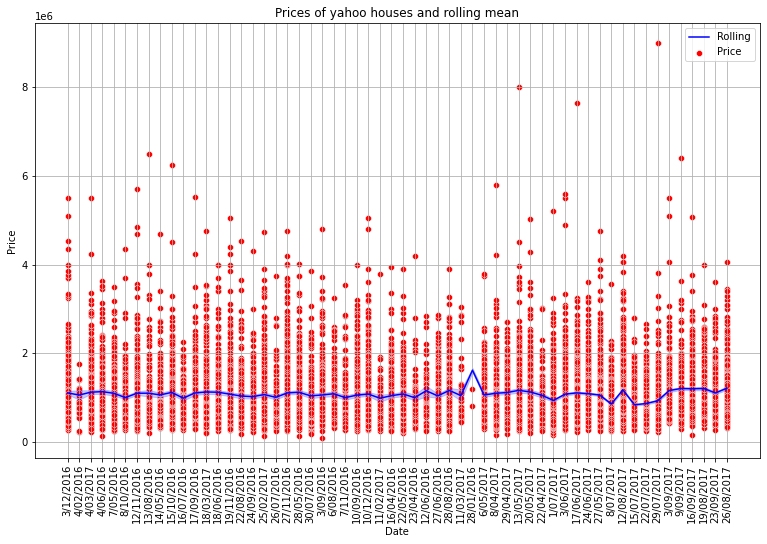

In [683]:
plot_pandas_rolling_mean(title="Prices of yahoo houses and rolling mean")

# Altair

In [684]:
smaller_df(y="Price", x_as_index=False, y_rolling=False)

,Date,Price
0,3/12/2016,1480000.0
1,4/02/2016,1035000.0
2,4/03/2017,1465000.0
3,4/03/2017,850000.0
4,4/06/2016,1600000.0
...,...,...
13575,26/08/2017,1245000.0
13576,26/08/2017,1031000.0
13577,26/08/2017,1170000.0
13578,26/08/2017,2500000.0


In [685]:
def plot_alt_rolling_mean(source=small_df):
    """
    Plots columns of taken DataFrame with scatter (first column) and line plot (second column). 
    Could set title.

        Parameters:
            source (DataFrame): DataFrame with max 2 columns. One of them must be date. Default = small_df.
             
        Returns: Plot.
    """
    
    line = alt.Chart(source).mark_line(
        color='red',
        size=3
    ).transform_window(
        rolling_mean='mean(Price)',
        frame=[-10]
    ).encode(
        x='Date:T',
        y='rolling_mean:Q'
    )

    points = alt.Chart(source).mark_point().encode(
        x='Date:T',
        y=alt.Y('Price:Q',
                axis=alt.Axis(title='Prices'))
    ).properties(
    width=640,
    height=480)

    return points + line

In [686]:
plot_alt_rolling_mean()

alt.LayerChart(...)